# Assignment Week 1 - Group 5

### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
filename1 = "fraudTrain.csv"
df_1 = pd.read_csv(filename1)
filename2 = "fraudTest.csv"
df_2 = pd.read_csv(filename2)

fraud_df = df_1.append(df_2)

In [160]:
fraud_df['txn_datetime'] =  pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

fraud_df['date_of_birth'] =  pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')
fraud_df['year_of_birth'] = fraud_df['date_of_birth'].dt.year
fraud_df['date_of_birth'] = fraud_df['date_of_birth'].dt.date

fraud_df['txn_date'] = fraud_df['txn_datetime'].dt.date

now = pd.to_datetime('now')
fraud_df['age'] = fraud_df.apply(lambda x: now.year - x['year_of_birth'], axis = 1)

In [39]:
sample_df = fraud_df.sample(frac=.1, random_state=12)

In [123]:
Fraud_age = sample_df['age'].loc[sample_df['is_fraud']==1]
NoFraud_age = sample_df['age'].loc[sample_df['is_fraud']==0]

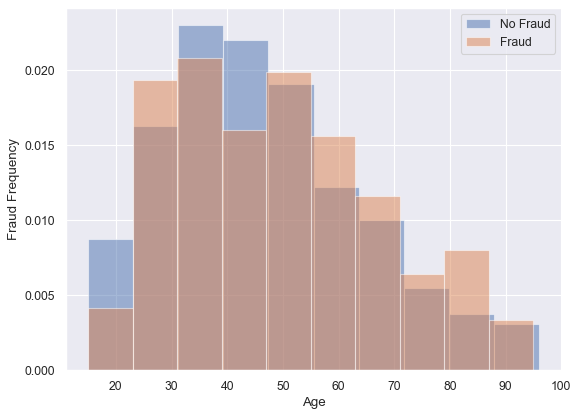

In [124]:
pyplot.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pyplot.hist(NoFraud_age, alpha=0.5, label='No Fraud',density=True)
pyplot.hist(Fraud_age, alpha=0.5, label='Fraud',density=True)
pyplot.legend(loc='upper right')
pyplot.title = ('Fraud Distribution Frequency by Age')
pyplot.xlabel('Age')
pyplot.ylabel('Fraud Frequency')
pyplot.show()

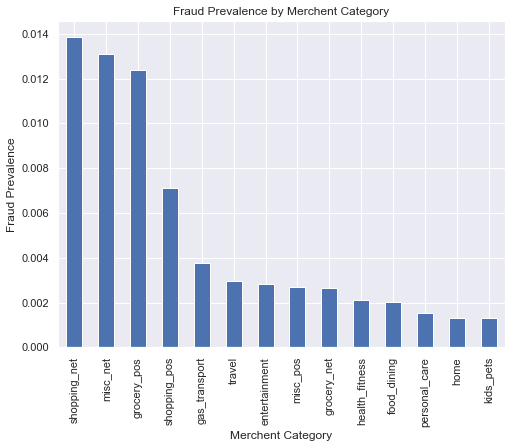

In [165]:
cat_fraud = sample_df[['category','is_fraud']].groupby('category').mean().sort_values(['is_fraud'],ascending = False)
mean_plot = cat_fraud.plot.bar(figsize=(8,6), title = 'Fraud Prevalence by Merchent Category', 
                               ylabel = 'Fraud Prevalence', xlabel = 'Merchent Category', legend = False)




In [158]:
cut_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
cut_bins = [0,10,20,30,40,50,60,70,80,90,100]
sample_df['age_bucket'] = pd.cut(sample_df['age'], bins=cut_bins, labels = cut_labels)
sample_df = sample_df.sort_values('age')

sample_df['age_quint'] = pd.qcut(sample_df['age'], q=10, precision=0)


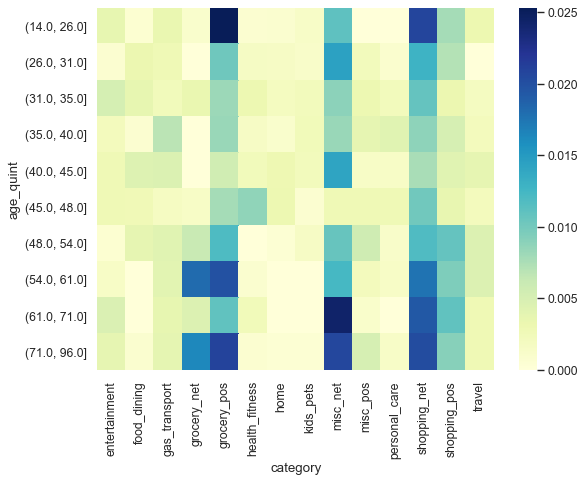

In [159]:
age_vs_cat = sample_df[['age_quint','category','is_fraud']]
age_vs_cat_pvt = pd.pivot_table(age_vs_cat, values='is_fraud', index=['age_quint'],
                    columns=['category'], aggfunc=np.mean)

#age_vs_cat_pvt.describe()
pyplot.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(age_vs_cat_pvt, cmap="YlGnBu")

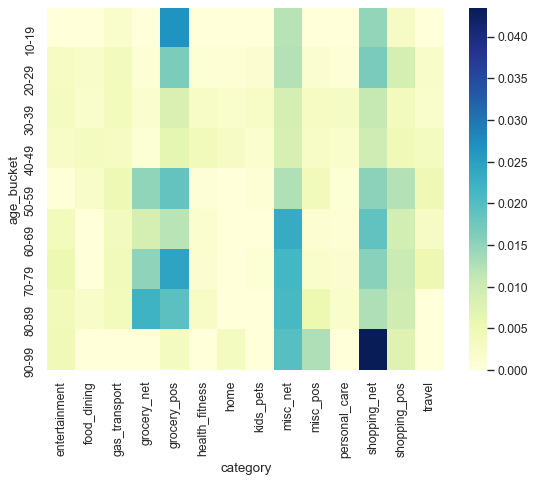

In [155]:
age_vs_cat = sample_df[['age_bucket','category','is_fraud']]
age_vs_cat_pvt = pd.pivot_table(age_vs_cat, values='is_fraud', index=['age_bucket'],
                    columns=['category'], aggfunc=np.mean)

#age_vs_cat_pvt.describe()
pyplot.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(age_vs_cat_pvt, cmap="YlGnBu")

In [137]:
for c in list(sample_df.columns):
    
    # get a list of unique values
    n = sample_df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Unnamed: 0: 179663 unique values
trans_date_trans_time: 184909 unique values
cc_num: 961 unique values
merchant: 693 unique values
category
['gas_transport' 'kids_pets' 'misc_pos' 'shopping_net' 'home'
 'food_dining' 'entertainment' 'shopping_pos' 'grocery_pos' 'misc_net'
 'health_fitness' 'personal_care' 'grocery_net' 'travel']
amt: 25791 unique values
first: 348 unique values
last: 480 unique values
gender
['F' 'M']
street: 961 unique values
city: 880 unique values
state: 51 unique values
zip: 948 unique values
lat: 946 unique values
long: 947 unique values
city_pop: 864 unique values
job: 489 unique values
dob: 946 unique values
trans_num: 185239 unique values
unix_time: 184909 unique values
merch_lat: 184175 unique values
merch_long: 184812 unique values
is_fraud
[0 1]
txn_datetime: 184909 unique values
date_of_birth: 946 unique values
year_of_birth: 81 unique values
txn_date: 730 unique values
age: 81 unique values
age_bucket
[90, 50, 60, 30, 40, 70, 80, 20, 100]
Categories (9, in